## multi variate time series analysis: 
has more than one time dependent variable

each variable not only depends on past vslues but some dependency on other variables

In [224]:
# import data and libraries
import os
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.font_manager
%matplotlib inline
import seaborn as sns
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv('anomaly_detection_data.csv')
import numpy as np
import warnings
warnings.simplefilter('ignore')
from ipywidgets import widgets

In [225]:
df['datetime']=df['date']+' '+df['time']
# df.isnull().sum()
# df.duplicated().sum()
import re

df['datetime']=df['datetime'].apply(lambda i: re.sub('\.',':',i))
df['datetime']=pd.to_datetime(df['datetime'])
df=df.sort_values(by='datetime')
df.head()

,date,time,timestamp,input current,input current (Min),input current (Max),input current (StdDev),current data 0x1,current data 0x2,current data 0x3,...,Engineering Sensors 13,motor fault counters 1,motor fault counters 2,motor fault counters 3,motor fault counters 4,motor fault counters 5,motor fault counters 6,motor fault counters 7,motor fault counters 8,datetime
41287,21-09-2014,12.39.19,21-09-2014 12.39,1.14,1.01,1.32,0.09,0.34,0.31,0.0,...,33.9,0,0,0,0,0,0,0,0,2014-09-21 12:39:19
41288,21-09-2014,12.39.29,21-09-2014 12.39,1.16,1.01,1.27,0.08,0.37,0.30,0.0,...,33.9,0,0,0,0,0,0,0,0,2014-09-21 12:39:29
41289,21-09-2014,12.39.39,21-09-2014 12.39,1.15,0.96,1.25,0.09,0.36,0.31,0.0,...,33.9,0,0,0,0,0,0,0,0,2014-09-21 12:39:39
41290,21-09-2014,12.39.49,21-09-2014 12.39,1.24,1.09,1.48,0.12,0.40,0.33,0.0,...,33.9,0,0,0,0,0,0,0,0,2014-09-21 12:39:49
41291,21-09-2014,12.39.59,21-09-2014 12.39,1.16,0.91,1.48,0.15,0.36,0.28,0.0,...,33.9,0,0,0,0,0,0,0,0,2014-09-21 12:39:59


In [226]:
df.drop(['date','time','timestamp'], axis=1, inplace=True)



# df.set_index('datetime',inplace=True)
# df.reset_index(inplace=True)


In [227]:
df.head()

,input current,input current (Min),input current (Max),input current (StdDev),current data 0x1,current data 0x2,current data 0x3,current data 0x4,current data 0x5,current data 0x6,...,Engineering Sensors 13,motor fault counters 1,motor fault counters 2,motor fault counters 3,motor fault counters 4,motor fault counters 5,motor fault counters 6,motor fault counters 7,motor fault counters 8,datetime
41287,1.14,1.01,1.32,0.09,0.34,0.31,0.0,0.06,0.59,0,...,33.9,0,0,0,0,0,0,0,0,2014-09-21 12:39:19
41288,1.16,1.01,1.27,0.08,0.37,0.30,0.0,0.06,0.61,0,...,33.9,0,0,0,0,0,0,0,0,2014-09-21 12:39:29
41289,1.15,0.96,1.25,0.09,0.36,0.31,0.0,0.06,0.59,0,...,33.9,0,0,0,0,0,0,0,0,2014-09-21 12:39:39
41290,1.24,1.09,1.48,0.12,0.40,0.33,0.0,0.07,0.71,0,...,33.9,0,0,0,0,0,0,0,0,2014-09-21 12:39:49
41291,1.16,0.91,1.48,0.15,0.36,0.28,0.0,0.05,0.62,0,...,33.9,0,0,0,0,0,0,0,0,2014-09-21 12:39:59


In [228]:

df1=pd.DataFrame(df[['Engineering Sensors 1',
       'Engineering Sensors 2', 'Engineering Sensors 3',
       'Engineering Sensors 4', 'Engineering Sensors 5',
       'Engineering Sensors 6', 'Engineering Sensors 7',
       'Engineering Sensors 8', 'Engineering Sensors 9',
       'Engineering Sensors 10', 'Engineering Sensors 11',
       'Engineering Sensors 12', 'Engineering Sensors 13']],index=df.index)


In [29]:
train_size=int(len(df1)*0.75)
test_size=len(df1)-train_size
train=df1.iloc[0:train_size]
test=df1.iloc[train_size:len(df1)]
print(train.shape,test.shape)

(31552, 13) (10518, 13)


##  OUTLIER DETECTION USING ISOLATION FORESTS

In [229]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from statsmodels import *

In [230]:
min_max_scaler = StandardScaler()
np_scaled = min_max_scaler.fit_transform(df1)
scaled_time_series = pd.DataFrame(np_scaled)
iff=IsolationForest(n_estimators=100,max_samples='auto',max_features=scaled_time_series.shape[1],n_jobs=-1,random_state=42,verbose=0)
iff.fit(scaled_time_series)
out_pred=iff.predict(scaled_time_series)
#Generate column for Isolation Forest-detected anomalies

scaled_time_series['Isolation_Forest_Anomaly'] = out_pred
scaled_time_series['Isolation_Forest_Anomaly'] = scaled_time_series['Isolation_Forest_Anomaly'].map( {1: False, -1: True} )
    

In [231]:
scaled_time_series.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,Isolation_Forest_Anomaly
0,6.725695,6.771687,-4.487962,-1.614167,0.414718,-0.672355,0.199289,-3.565798,-2.053981,-6.511352,-0.309213,-2.252637,-0.065426,True
1,6.725695,6.771687,-4.046623,-0.683583,0.186871,0.433429,0.199289,-2.200197,-2.053981,-6.511352,-0.579331,-2.252637,-0.065426,True


In [232]:
scaled_time_series['Isolation_Forest_Anomaly'].value_counts()

False    39937
True      2133
Name: Isolation_Forest_Anomaly, dtype: int64

## OUTLIER DETECTION USING OCSVM

In [233]:
from sklearn.svm import OneClassSVM

In [234]:
outliers_fraction = 0.05 
nu_estimate = 0.95 * outliers_fraction + 0.05
model=OneClassSVM(nu=nu_estimate, kernel="rbf", gamma=0.01)
model.fit(scaled_time_series)
#Create a column for the anomaly
pred=model.predict(scaled_time_series)


In [236]:
scaled_time_series['OCSVM_Anomaly'] = pred
scaled_time_series['OCSVM_Anomaly'] = scaled_time_series['OCSVM_Anomaly'].map( {1: False, -1: True} )
    

In [350]:
scaled_time_series.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,Isolation_Forest_Anomaly,OCSVM_Anomaly
0,6.725695,6.771687,-4.487962,-1.614167,0.414718,-0.672355,0.199289,-3.565798,-2.053981,-6.511352,-0.309213,-2.252637,-0.065426,True,True
1,6.725695,6.771687,-4.046623,-0.683583,0.186871,0.433429,0.199289,-2.200197,-2.053981,-6.511352,-0.579331,-2.252637,-0.065426,True,True
2,6.725695,6.771687,-4.487962,0.247002,0.642566,0.433429,1.050596,-2.200197,-2.053981,-6.511352,0.231022,-2.252637,-0.065426,True,True
3,6.571718,6.892753,-4.487962,0.247002,0.642566,0.802024,1.050596,0.531006,-0.271540,-6.231290,-0.039095,-2.252637,-0.065426,True,True
4,6.571718,6.892753,-4.487962,1.177587,1.553956,1.170619,1.476249,0.075805,-1.162760,-6.511352,-0.039095,-2.252637,-0.065426,True,True


## Conclusion: Model chosen for outlier detection is Isolation Forest , now class labels added to main dataframe

In [238]:
df1['Isolation_Forest_Anomaly']=scaled_time_series['Isolation_Forest_Anomaly'].values

In [239]:
df1['Isolation_Forest_Anomaly'].value_counts()

False    39937
True      2133
Name: Isolation_Forest_Anomaly, dtype: int64

Now we have 13 metrics on which we have classified anomalies based on Isolation Forests. will try to **visualize**  the results and check if the classification makes sense

Normalize and fix the metrics to **PCA** to reduce to reduce the number of dimensions and then plot them in 3D highlighting the anomalies. 

In [240]:
to_model_columns=df1.columns[0:13]


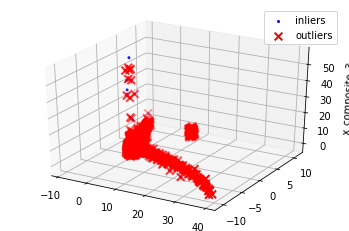

In [203]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(df1[to_model_columns])
X_reduce = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2],
           s=4, lw=1, label="inliers",c="blue")


outliers=df1.loc[df1['Isolation_Forest_Anomaly']==True]
outlier_index=list(df.index)
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1],
           X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()


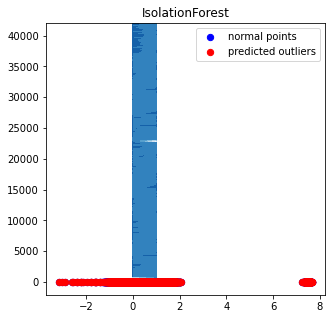

In [202]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(df1[to_model_columns])


res=pd.DataFrame(pca.transform(df1[to_model_columns]))

Z = np.array(res)
figsize=(5, 5)
plt.figure(figsize=figsize)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(res[0], res[1], c='blue',
                 s=40,label="normal points")

b1 = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='red',
                 s=40,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

**2D plot gives a better picture,Anomalies are highlighted as red edges and normal points are indicated with blue points in the plot.**

## Data Modeling
1. lin models: pca, mcd, ocsvm
2. proximity/density based= lof, cblof, knn, hbos
3. probabilistic= abod
4. oulier ensembles and combination= IF, feature bagging, lscp
5. clustering=kmeans


## MODEL BUILDING



In [273]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,confusion_matrix,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report

In [ ]:
cols=['Engineering Sensors 1',
       'Engineering Sensors 2', 'Engineering Sensors 3',
       'Engineering Sensors 4', 'Engineering Sensors 5',
       'Engineering Sensors 6', 'Engineering Sensors 7',
       'Engineering Sensors 8', 'Engineering Sensors 9',
       'Engineering Sensors 10', 'Engineering Sensors 11',
       'Engineering Sensors 12', 'Engineering Sensors 13']

In [320]:
df2=df
x=df2[cols]
y=df1['Isolation_Forest_Anomaly']
# calculation for value of 'nu' in one class SVM
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=6)
train_normal=y_train[y_train==False]   
train_outliers=y_train[y_train==True]
outlier_prop=len(train_outliers)/len(train_normal)                                                 

In [321]:

def run_model(predictors,target, model):
    X_train, X_test, y_train, y_test = train_test_split(predictors,
                                                        target, test_size=0.2, random_state=6)
   
    # fit model
    model.fit(X_train, y_train)
    # predict target on test data
    y_scores = model.predict(X_test)
    ns_probs=[0 for _ in range(len(y_test))]
    # predict target probabilities
    lr_probs=model.predict(X_test)
    # calculate ROC-AUC scores
    ns_auc=roc_auc_score(y_test,ns_probs)
    lr_auc=roc_auc_score(y_test,lr_probs)
    # calculate roc curves
    ns_fpr,ns_tpr, _ =roc_curve(y_test,ns_probs)
    lr_fpr,lr_tpr, _ =roc_curve(y_test,lr_probs)
    
    print('Classification Report:\n',classification_report(y_test, y_scores))
    print("Precision Score : ",precision_score(y_test, y_scores,average='weighted').round(3))
    print("Recall Score : ",recall_score(y_test, y_scores,average='weighted').round(3))
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--',label='No Skill')
    plt.plot(lr_fpr, lr_tpr, linestyle='--',label='Logical Skill')
    # aaxis labels
    plt.xlabel('False Positive rate')
    plt.ylabel('True  Positive rate')
    # show the legend
    plt.legend()
    #show the plot
    plt.show()
    #summarize scores
    print('No Skill : ROC AUC = %.3f' % (ns_auc))
    print('Logistic : ROC AUC = %.3f' % (lr_auc))
   

========== Angle based outlier detector ==================================================
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.92      0.94      7943
        True       0.25      0.45      0.32       471

    accuracy                           0.89      8414
   macro avg       0.61      0.68      0.63      8414
weighted avg       0.93      0.89      0.91      8414

Precision Score :  0.926
Recall Score :  0.894


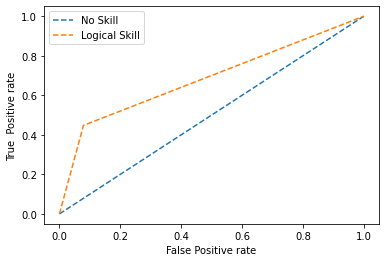

No Skill : ROC AUC = 0.500
Logistic : ROC AUC = 0.684
========== CLuster based Local outlier Factor ==================================================
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.95      0.97      7943
        True       0.52      0.97      0.67       471

    accuracy                           0.95      8414
   macro avg       0.76      0.96      0.82      8414
weighted avg       0.97      0.95      0.95      8414

Precision Score :  0.971
Recall Score :  0.947


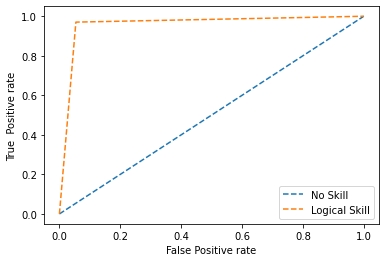

No Skill : ROC AUC = 0.500
Logistic : ROC AUC = 0.958
========== K Nearest Neighbours ==================================================
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.93      0.95      7943
        True       0.31      0.55      0.39       471

    accuracy                           0.91      8414
   macro avg       0.64      0.74      0.67      8414
weighted avg       0.93      0.91      0.92      8414

Precision Score :  0.935
Recall Score :  0.905


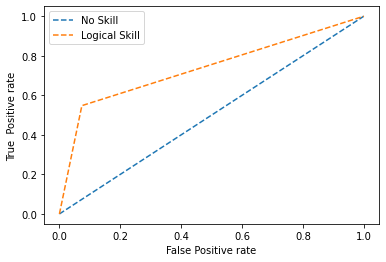

No Skill : ROC AUC = 0.500
Logistic : ROC AUC = 0.737
========== OCSVM ==================================================
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      7943
           1       0.02      0.42      0.05       471

    accuracy                           0.02      8414
   macro avg       0.01      0.14      0.02      8414
weighted avg       0.00      0.02      0.00      8414

Precision Score :  0.001
Recall Score :  0.023


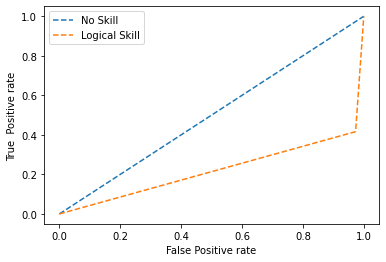

No Skill : ROC AUC = 0.500
Logistic : ROC AUC = 0.222
========== Isolation forest ==================================================
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.95      0.97      7943
        True       0.53      1.00      0.70       471

    accuracy                           0.95      8414
   macro avg       0.77      0.97      0.83      8414
weighted avg       0.97      0.95      0.96      8414

Precision Score :  0.974
Recall Score :  0.951


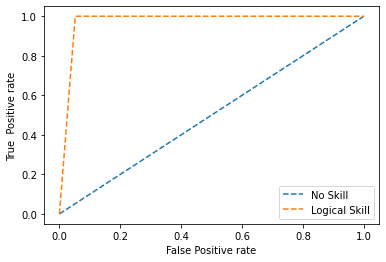

No Skill : ROC AUC = 0.500
Logistic : ROC AUC = 0.974


In [325]:
models = {'Angle based outlier detector':ABOD()
          ,'CLuster based Local outlier Factor':CBLOF()
          ,'K Nearest Neighbours': KNN()
          ,'OCSVM':OneClassSVM(nu=outlier_prop, kernel="rbf",gamma=0.0001)
          ,'Isolation forest':IForest(n_estimators=100,max_samples='auto',
                                      n_jobs=-1,random_state=42,verbose=0)}


j = 0
for i in models.items():
    print('='*10,list(models.keys())[j],'='*50)
    model = i[1]
    a = run_model(x, y, model)
    j=j+1

### Model selected : Isolated Forest , ROC-AUC= 0.974
Hyperparameter tuning using GridSearchCV to check if the score improves

In [316]:
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.datasets import make_classification


In [345]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x,y, test_size=0.2, random_state=6)
   

clf = IsolationForest(random_state=47, behaviour='new')

param_grid = {'n_estimators': [10, 100], 
              'max_samples': [100, 500, 5,'auto'], 
              'contamination': [0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features': [10,13,5], 
              'bootstrap': [True, False], 
              'n_jobs': [5, 10, 20, 30,-1]}

  
    
grid_dt_estimator = model_selection.RandomizedSearchCV(clf, 
                                                 param_grid,
                                                 scoring='roc_auc', 
                                                  refit=True,
                                                 cv=5, 
                                                 return_train_score=True)
grid_dt_estimator.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=IsolationForest(behaviour='new', bootstrap=False,
                                             contamination='auto',
                                             max_features=1.0,
                                             max_samples='auto',
                                             n_estimators=100, n_jobs=None,
                                             random_state=47, verbose=0,
                                             warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'bootstrap': [True, False],
                                        'contamination': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'max_features': [10, 13, 5],
                                        'max_samples': [100, 500, 5, 'auto'],
                                        'n_estimators

In [346]:
grid_dt_estimator.best_params_,grid_dt_estimator.best_score_

({'n_jobs': -1,
  'n_estimators': 10,
  'max_samples': 5,
  'max_features': 10,
  'contamination': 0.3,
  'bootstrap': True},
 0.17845020825539112)

In [347]:
final_model=IsolationForest(n_estimators=10,max_samples=5,
                            contamination=0.3,max_features=10, 
                            bootstrap=True,n_jobs=-1)
 
final_model.fit(X_train1,y_train1)
y_pred_final = final_model.predict(X_test1)

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      7943
           1       0.02      0.24      0.03       471

    accuracy                           0.01      8414
   macro avg       0.01      0.08      0.01      8414
weighted avg       0.00      0.01      0.00      8414

Precision Score :  0.001
Recall Score :  0.013


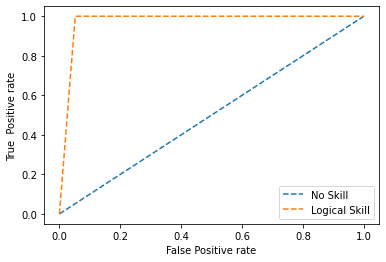

No Skill : ROC AUC = 0.500
Logistic : ROC AUC = 0.974


In [349]:
ns_probs=[0 for _ in range(len(y_test1))]
#predict target probabilities
lr_probs=model.predict(X_test1)
# calculate ROC-AUC scores
ns_auc=roc_auc_score(y_test1,ns_probs)
lr_auc=roc_auc_score(y_test1,lr_probs)
#calculate roc curves
ns_fpr,ns_tpr, _ =roc_curve(y_test1,ns_probs)
lr_fpr,lr_tpr, _ =roc_curve(y_test1,lr_probs)
print('Classification Report:\n',classification_report(y_test1, y_pred_final))
print("Precision Score : ",precision_score(y_test1, y_pred_final,average='weighted').round(3))
print("Recall Score : ",recall_score(y_test1, y_pred_final,average='weighted').round(3))
#plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--',label='No Skill')
plt.plot(lr_fpr, lr_tpr, linestyle='--',label='Logical Skill')
#aaxis labels
plt.xlabel('False Positive rate')
plt.ylabel('True  Positive rate')
#show the legend
plt.legend()
#show the plot
plt.show()
#summarize scores
print('No Skill : ROC AUC = %.3f' % (ns_auc))
print('Logistic : ROC AUC = %.3f' % (lr_auc))